In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.neural_network as nn
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [22]:
datos = pd.read_csv("FOTOSINTESIS.csv", delimiter=";")

In [23]:
datos.head()

,Ano,Cod,Bloque,Altura planta,Area de copa (A) =m2,Diametro tronco (cm),A.F no destructiva m2,P,Asimilacion de CO2,Uso eficiente del agua,...,Conductividad,K,MO,Radiacion,Temperatura,Conductividad electrica,Lluvias acumuladas (mms),Humedad,Numero de dias con lluvia,Total
0,2015,1,1,239.75,4.063267,15.700,10.753787,8.323926,2.36,0.634409,...,0.10,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,991.987500
1,2015,1,2,192.50,5.321635,15.600,7.621132,8.323926,1.73,1.291045,...,0.02,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,540.582500
2,2015,2,2,224.75,7.213035,16.350,13.110679,8.323926,2.72,1.219731,...,0.04,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,267.533333
3,2015,3,2,158.00,2.744031,13.025,3.252769,8.323926,3.20,1.245136,...,0.05,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,1826.063750
4,2015,4,2,196.00,5.925922,16.525,8.810752,8.323926,5.70,1.775701,...,0.07,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,586.963500


In [24]:
datos.describe(include="all")

,Ano,Cod,Bloque,Altura planta,Area de copa (A) =m2,Diametro tronco (cm),A.F no destructiva m2,P,Asimilacion de CO2,Uso eficiente del agua,...,Conductividad,K,MO,Radiacion,Temperatura,Conductividad electrica,Lluvias acumuladas (mms),Humedad,Numero de dias con lluvia,Total
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,4.280000e+02,428.000000,428.000000,428.000000,428.000000,428.000000,390.000000
mean,2016.154206,30.630841,2.007009,248.828738,9.432962,19.853968,17.868148,9.734986,5.359831,2.764880,...,0.073330,0.205379,2.364991,3.060911e+06,25.757734,0.024231,1276.377570,0.228553,140.406542,2090.799740
std,0.761827,17.257363,0.819806,38.096877,3.572912,3.983536,7.517275,1.797793,3.689078,1.375274,...,0.056801,0.039914,0.269747,9.399903e+05,0.663663,0.005511,148.459264,0.044046,46.773440,1873.265955
min,2015.000000,1.000000,1.000000,144.500000,2.090303,8.950000,2.013062,7.998346,0.500000,0.294118,...,0.010000,0.146243,2.084278,1.950568e+06,24.870093,0.016865,1093.900000,0.169014,83.000000,52.780000
25%,2016.000000,16.000000,1.000000,223.500000,6.691019,17.093750,12.125151,8.323926,2.307500,1.711246,...,0.030000,0.169256,2.151051,2.388864e+06,25.284462,0.017657,1093.900000,0.199129,83.000000,664.110000
50%,2016.000000,31.000000,2.000000,252.875000,9.366032,19.762500,17.365473,9.221156,4.100000,2.542913,...,0.055230,0.220925,2.428593,2.928772e+06,25.686246,0.028213,1348.100000,0.224652,153.000000,1507.513166
75%,2017.000000,46.000000,3.000000,275.541667,11.918474,22.543750,22.888380,10.961810,8.666222,3.655186,...,0.101645,0.239888,2.431143,3.232440e+06,26.631139,0.028447,1348.100000,0.258711,188.000000,3078.201969
max,2017.000000,60.000000,3.000000,340.500000,29.472410,30.375000,38.557680,13.156162,13.778217,10.630813,...,0.300661,0.261377,2.881437,4.756071e+06,26.666330,0.032485,1457.300000,0.317375,188.000000,11619.936420


In [25]:
datos = datos.fillna(datos.mean())

In [26]:
datos = datos.drop(['Ano','Cod','Bloque'], axis=1)

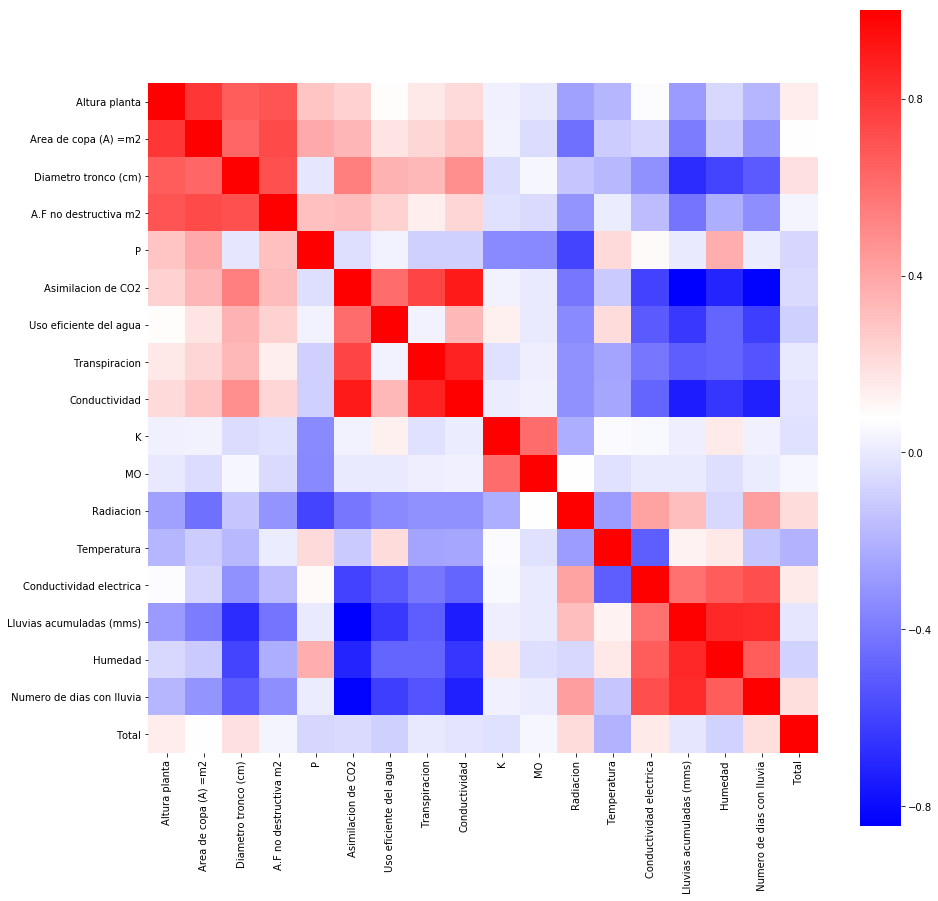

In [27]:
C_mat = datos.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(C_mat, vmax = 1, square = True, cmap = "bwr")
plt.show()

In [28]:
C_mat[:]

,Altura planta,Area de copa (A) =m2,Diametro tronco (cm),A.F no destructiva m2,P,Asimilacion de CO2,Uso eficiente del agua,Transpiracion,Conductividad,K,MO,Radiacion,Temperatura,Conductividad electrica,Lluvias acumuladas (mms),Humedad,Numero de dias con lluvia,Total
Altura planta,1.000000,0.804657,0.663234,0.696098,0.290431,0.240128,0.090920,0.160648,0.212127,0.026339,-0.001517,-0.264831,-0.182317,0.063989,-0.284795,-0.060188,-0.181251,0.144431
Area de copa (A) =m2,0.804657,1.000000,0.628925,0.727724,0.381571,0.338127,0.172289,0.225243,0.290189,0.033548,-0.050786,-0.434778,-0.104499,-0.069535,-0.395805,-0.115048,-0.308694,0.085360
Diametro tronco (cm),0.663234,0.628925,1.000000,0.708650,-0.009722,0.546067,0.355182,0.330251,0.485394,-0.046255,0.045479,-0.126558,-0.175983,-0.324019,-0.682619,-0.597209,-0.519033,0.191950
A.F no destructiva m2,0.696098,0.727724,0.708650,1.000000,0.305957,0.318719,0.237275,0.141212,0.226740,-0.030358,-0.051477,-0.304622,0.012393,-0.165499,-0.420251,-0.214205,-0.327339,0.038321
P,0.290431,0.381571,-0.009722,0.305957,1.000000,-0.043811,0.033972,-0.088428,-0.087480,-0.339798,-0.350868,-0.592316,0.207875,0.093830,0.004089,0.367762,0.006626,-0.066231
Asimilacion de CO2,0.240128,0.338127,0.546067,0.318719,-0.043811,1.000000,0.609936,0.751922,0.905616,0.034540,0.004120,-0.411611,-0.112930,-0.603506,-0.843634,-0.707657,-0.835019,-0.052186
Uso eficiente del agua,0.090920,0.172289,0.355182,0.237275,0.033972,0.609936,1.000000,0.033887,0.333894,0.134197,0.003639,-0.344878,0.205673,-0.514483,-0.640524,-0.480717,-0.618517,-0.088342
Transpiracion,0.160648,0.225243,0.330251,0.141212,-0.088428,0.751922,0.033887,1.000000,0.876482,-0.036172,0.014228,-0.319994,-0.252025,-0.416424,-0.500037,-0.478962,-0.538727,-0.006396
Conductividad,0.212127,0.290189,0.485394,0.226740,-0.087480,0.905616,0.333894,0.876482,1.000000,0.009086,0.024955,-0.320524,-0.241915,-0.479960,-0.739192,-0.645560,-0.723413,-0.016926
K,0.026339,0.033548,-0.046255,-0.030358,-0.339798,0.034540,0.134197,-0.036172,0.009086,1.000000,0.606665,-0.211234,0.063235,0.054961,0.017654,0.150426,0.021449,-0.033756


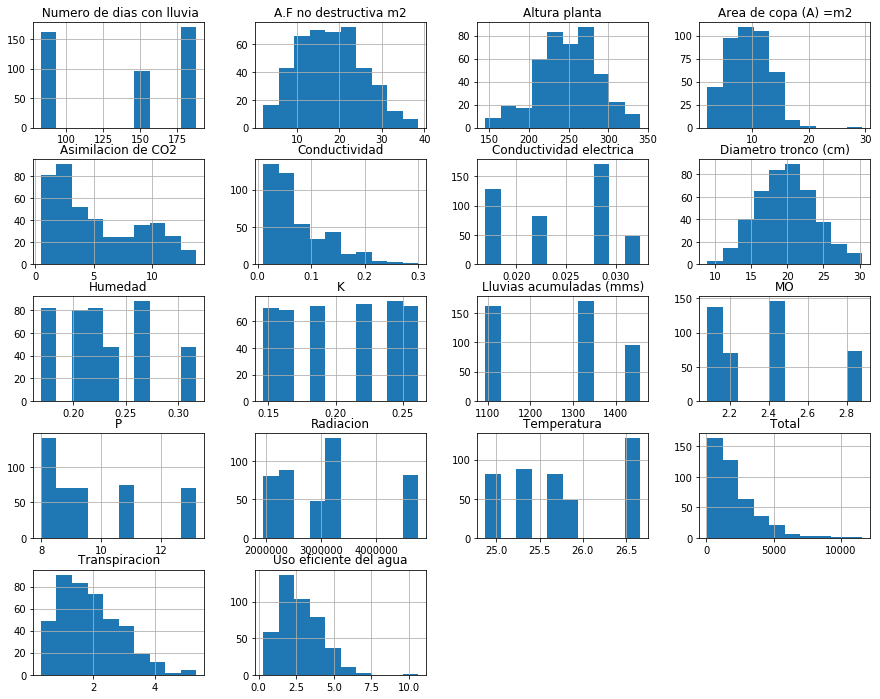

In [29]:
datos.hist(figsize = (15,12))
plt.show()

In [30]:
cols_to_norm = ['Altura planta','Area de copa (A) =m2', 'Diametro tronco (cm)','A.F no destructiva m2','P','Asimilacion de CO2','Uso eficiente del agua','Transpiracion','Conductividad','K','MO','Radiacion','Temperatura','Conductividad electrica','Lluvias acumuladas (mms)','Humedad',' Numero de dias con lluvia','Total']
datos[cols_to_norm] = datos[cols_to_norm].apply(lambda X: (X - X.min()) / (X.max() - X.min()))

In [31]:
#datos = datos.drop(['Ano','Cod','Bloque','Altura planta','Area de copa (A) =m2','Diametro tronco (cm)','A.F no destructiva m2','P','Asimilacion de CO2','Uso eficiente del agua','Transpiracion','Conductividad','K','MO','Conductividad electrica',' Numero de dias con lluvia'], axis=1)
datos = datos.drop(['Area de copa (A) =m2','A.F no destructiva m2','P','Asimilacion de CO2','Uso eficiente del agua','Transpiracion','Conductividad','K','MO','Humedad','Lluvias acumuladas (mms)'], axis=1)

In [32]:
datos.head()

,Altura planta,Diametro tronco (cm),Radiacion,Temperatura,Conductividad electrica,Numero de dias con lluvia,Total
0,0.485969,0.315053,0.404994,0.980408,0.050663,0.666667,0.081196
1,0.244898,0.310385,0.404994,0.980408,0.050663,0.666667,0.042171
2,0.409439,0.345391,0.404994,0.980408,0.050663,0.666667,0.018566
3,0.068878,0.190198,0.404994,0.980408,0.050663,0.666667,0.153303
4,0.262755,0.353559,0.404994,0.980408,0.050663,0.666667,0.046181


In [33]:
#C_mat = datos.corr()
#fig = plt.figure(figsize = (15,15))
#sb.heatmap(C_mat, vmax = 1, square = True, cmap = "bwr")
#plt.show()

In [34]:
datos.describe(include="all")

,Altura planta,Diametro tronco (cm),Radiacion,Temperatura,Conductividad electrica,Numero de dias con lluvia,Total
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,0.532289,0.508937,0.395773,0.494167,0.471557,0.546729,0.176190
std,0.194372,0.185929,0.335052,0.369474,0.352819,0.445461,0.154573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403061,0.380105,0.156227,0.230687,0.050663,0.000000,0.059836
50%,0.552934,0.504667,0.348673,0.454368,0.726529,0.666667,0.143664
75%,0.668580,0.634481,0.456913,0.980408,0.741519,1.000000,0.244706
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


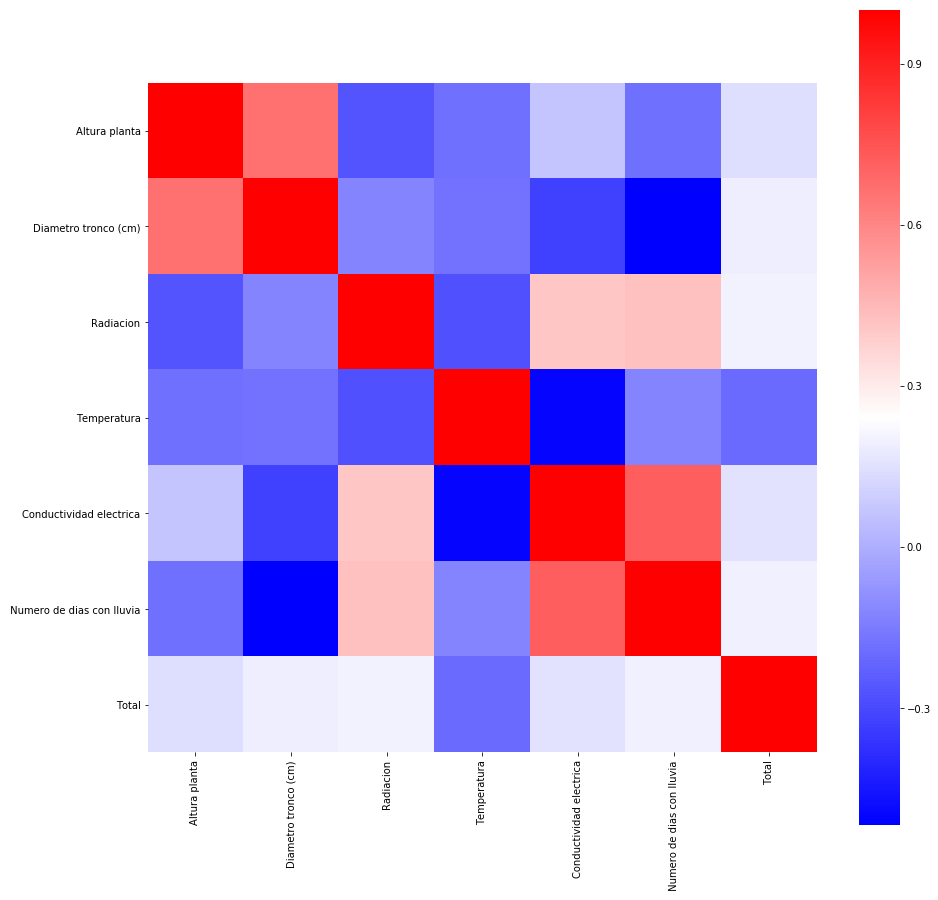

In [35]:
C_mat = datos.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(C_mat, vmax = 1, square = True, cmap = "bwr")
plt.show()

In [36]:
C_mat 

,Altura planta,Diametro tronco (cm),Radiacion,Temperatura,Conductividad electrica,Numero de dias con lluvia,Total
Altura planta,1.000000,0.663234,-0.264831,-0.182317,0.063989,-0.181251,0.144431
Diametro tronco (cm),0.663234,1.000000,-0.126558,-0.175983,-0.324019,-0.519033,0.191950
Radiacion,-0.264831,-0.126558,1.000000,-0.280832,0.412383,0.427648,0.202018
Temperatura,-0.182317,-0.175983,-0.280832,1.000000,-0.504648,-0.124930,-0.199650
Conductividad electrica,0.063989,-0.324019,0.412383,-0.504648,1.000000,0.715479,0.154516
Numero de dias con lluvia,-0.181251,-0.519033,0.427648,-0.124930,0.715479,1.000000,0.197703
Total,0.144431,0.191950,0.202018,-0.199650,0.154516,0.197703,1.000000


In [37]:
datos = datos.drop(['Altura planta','Conductividad electrica'], axis=1)


In [38]:
# Especificar X y Y
X = datos.values[:,:-1]  #[:,14:18] #[:,3:-1]
Y = datos.values[:,-1]

In [39]:
# hacer validación cruzada
kf = KFold(n_splits=5,random_state=0, shuffle=True)
kf.get_n_splits(X)

5

In [40]:
#CON VALIDACIÓN CRUZADA

R = []
MSE = []   
MAE = []   
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    mlp = nn.MLPRegressor(solver='adam', hidden_layer_sizes=10, max_iter=100, activation='relu', random_state=1, learning_rate_init=0.025, batch_size='auto', momentum=0.09)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("R2: ", r2)
    print("MSE: ", mse)
    print("RMSE: ", np.sqrt(mse))
    print('MAE: ', mae)
    R.append(r2)
    MSE.append(mse)
    MAE.append(mae)
print("meanR2: ",np.array(R).mean())
print("meanMSE: ",np.array(MSE).mean())
print("meanRMSE: ", np.sqrt(MSE).mean())
print('meanMAE: ',np.array(MAE).mean())


R2:  0.16908114574224753
MSE:  0.02486275350185581
RMSE:  0.15767927416707567
MAE:  0.11770691762769865
R2:  0.06847919872978925
MSE:  0.020605465856566835
RMSE:  0.14354604089478343
MAE:  0.11096472603957719
R2:  0.04400478470689573
MSE:  0.01934520570849665
RMSE:  0.1390870436399331
MAE:  0.11345470031836294
R2:  0.13843067433754908
MSE:  0.0266370975146931
RMSE:  0.1632087544058011
MAE:  0.11136542157761536
R2:  0.11417686236145863
MSE:  0.014028223511547647
RMSE:  0.11844080171776805
MAE:  0.09507879285213795
meanR2:  0.10683453317558804
meanMSE:  0.02109574921863201
meanRMSE:  0.14439238296507226
meanMAE:  0.10971411168307843
